In [1]:
import datetime
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import ylim
from sklearn import neighbors
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from operator import itemgetter
from itertools import groupby
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('assignment-data/data_for_student_case.csv', dtype={'bin':str, 'amount':int})
df = df.drop(['txid','bookingdate'], axis='columns')
df = df.rename(index=str, columns={'issuercountrycode':'issuercountry', 'bin':'issuer_id', 'shoppercountrycode':'shoppercountry', 'shopperinteraction':'interaction', 'shopperinteraction':'interaction', 'cardverificationcodesupplied':'verification', 'cvcresponsecode':'cvcresponse', 'creationdate':'creationdate_stamp', 'simple_journal':'label'})

# Skip data if:
df = df[df['label']!='Refused']
df = df[~df['issuer_id'].str.contains('na', case=False)]
df = df[~df['mail_id'].str.contains('na', case=False)]

# Create and format (new) columns
df['creationdate'] = (pd.to_datetime(df['creationdate_stamp'])).dt.date
df['mail_id'] = df['mail_id'].str.replace('mail','')
df['ip_id'] = df['ip_id'].str.replace('ip','')
df['card_id'] = df['card_id'].str.replace('card','')
df['label'] = df['label'].apply(lambda x: '1' if x == 'Chargeback' else '0')

print(len(df))

236698


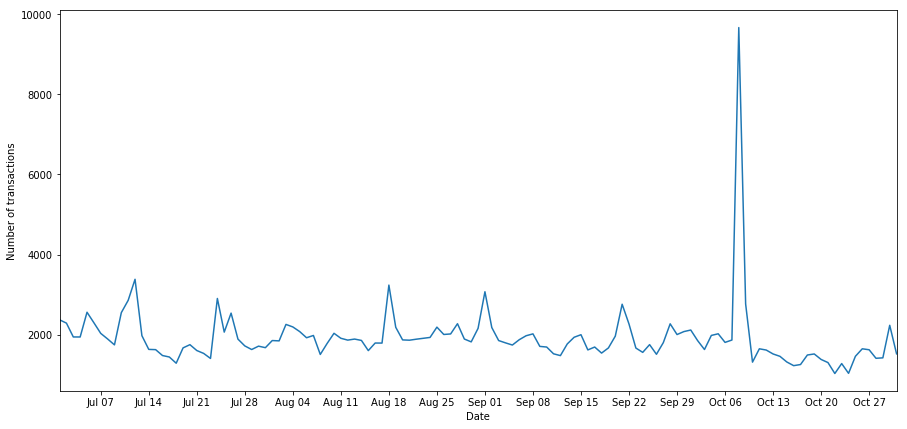

In [3]:
# t_day = df.groupby('creationdate')['amount'].agg(['count'])
t_day = df.groupby('creationdate')['amount'].agg(['count'])

#plot data
fig, ax = plt.subplots(figsize=(15,7))
t_day.plot(ax=ax)
ax.set(xlabel="Date", ylabel="Number of transactions")
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.get_legend().remove()